# Loan Approval Prediction

## Project Overview
This project focuses on building a classification model to predict loan approval status based on various applicant and loan-related features. The dataset consists of 45,000 records and 14 variables, including demographic, financial, and credit-related information. The target variable (loan_status) indicates whether the loan was approved (1) or rejected (0).

---

## Dataset Description
This dataset contains **45,000 records** with **14 variables** related to loan applicants. The dataset includes both categorical and numerical features, as described below:

| Column Name                     | Description                                           | Type         |
|---------------------------------|-------------------------------------------------------|--------------|
| `person_age`                    | Age of the person                                     | Float        |
| `person_gender`                 | Gender of the person                                 | Categorical  |
| `person_education`              | Highest education level                              | Categorical  |
| `person_income`                 | Annual income                                        | Float        |
| `person_emp_exp`                | Years of employment experience                       | Integer      |
| `person_home_ownership`         | Home ownership status (e.g., rent, own, mortgage)    | Categorical  |
| `loan_amnt`                     | Loan amount requested                                | Float        |
| `loan_intent`                   | Purpose of the loan                                  | Categorical  |
| `loan_int_rate`                 | Loan interest rate                                   | Float        |
| `loan_percent_income`           | Loan amount as a percentage of annual income         | Float        |
| `cb_person_cred_hist_length`    | Length of credit history in years                   | Float        |
| `credit_score`                  | Credit score of the person                          | Integer      |
| `previous_loan_defaults_on_file`| Indicator of previous loan defaults                 | Categorical  |
| `loan_status`                   | Loan approval status: 1 = approved; 0 = rejected     | Integer      |

---

# Project Goals

1. Analyze the loan approval dataset and uncover key insights related to the approval and rejection rates.
2. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling numerical features.
3. Build and evaluate several classification models (Logistic Regression, Random Forest, XGBoost, KNN) to predict loan approval status.
4. Compare the models based on performance metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.
5. Select the best-performing model based on evaluation metrics.

---

# Methods and Tools

### **Methods**

1. **Exploratory Data Analysis (EDA)**: Visualize relationships between features and loan approval status, identify patterns and correlations.
2. **Data Preprocessing**: Handle missing values, encode categorical features, and scale numerical features to prepare the dataset for model training.
3. **Modeling**: Train several classification models (Logistic Regression, Random Forest, XGBoost, KNN) and evaluate their performance.
4. **Model Evaluation**: Use metrics like accuracy, precision, recall, F1-score, and ROC-AUC to compare model performance.
5. **Model Optimization**: Optimize models using cross-validation.

### **Tools**

- **Python**: Primary programming language used for data analysis and modeling.
- **Libraries**: 
  - **Pandas**: Data manipulation and analysis.
  - **Matplotlib / Seaborn**: Data visualization.
  - **Scikit-learn**: For building and evaluating machine learning models.
  - **XGBoost**: For gradient boosting models.

---

In [127]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Import Libraries and Load Data

In [128]:
# Load the dataset
file_path = 'loan_approval_dataset.csv'  # Update with your actual file path
df = pd.read_csv('loan_data.csv')

# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset Overview:
   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3

#### Data Preprocessing

In [129]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

print("\nTotal no of missing values in dataset:")
print(df.isnull().sum().sum())

Missing values per column:
person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Total no of missing values in dataset:
0


#### Exploratory Data Analysis (EDA) to understand the dataset better before preprocessing or modeling

In [130]:
# Check summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))

# Check for unique values in categorical columns
categorical_features = [
    'person_gender', 'person_education', 'person_home_ownership',
    'loan_intent', 'previous_loan_defaults_on_file'
]

for col in categorical_features:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())


Summary statistics:
          person_age person_gender person_education  person_income  \
count   45000.000000         45000            45000   4.500000e+04   
unique           NaN             2                5            NaN   
top              NaN          male         Bachelor            NaN   
freq             NaN         24841            13399            NaN   
mean       27.764178           NaN              NaN   8.031905e+04   
std         6.045108           NaN              NaN   8.042250e+04   
min        20.000000           NaN              NaN   8.000000e+03   
25%        24.000000           NaN              NaN   4.720400e+04   
50%        26.000000           NaN              NaN   6.704800e+04   
75%        30.000000           NaN              NaN   9.578925e+04   
max       144.000000           NaN              NaN   7.200766e+06   

        person_emp_exp person_home_ownership     loan_amnt loan_intent  \
count     45000.000000                 45000  45000.000000      

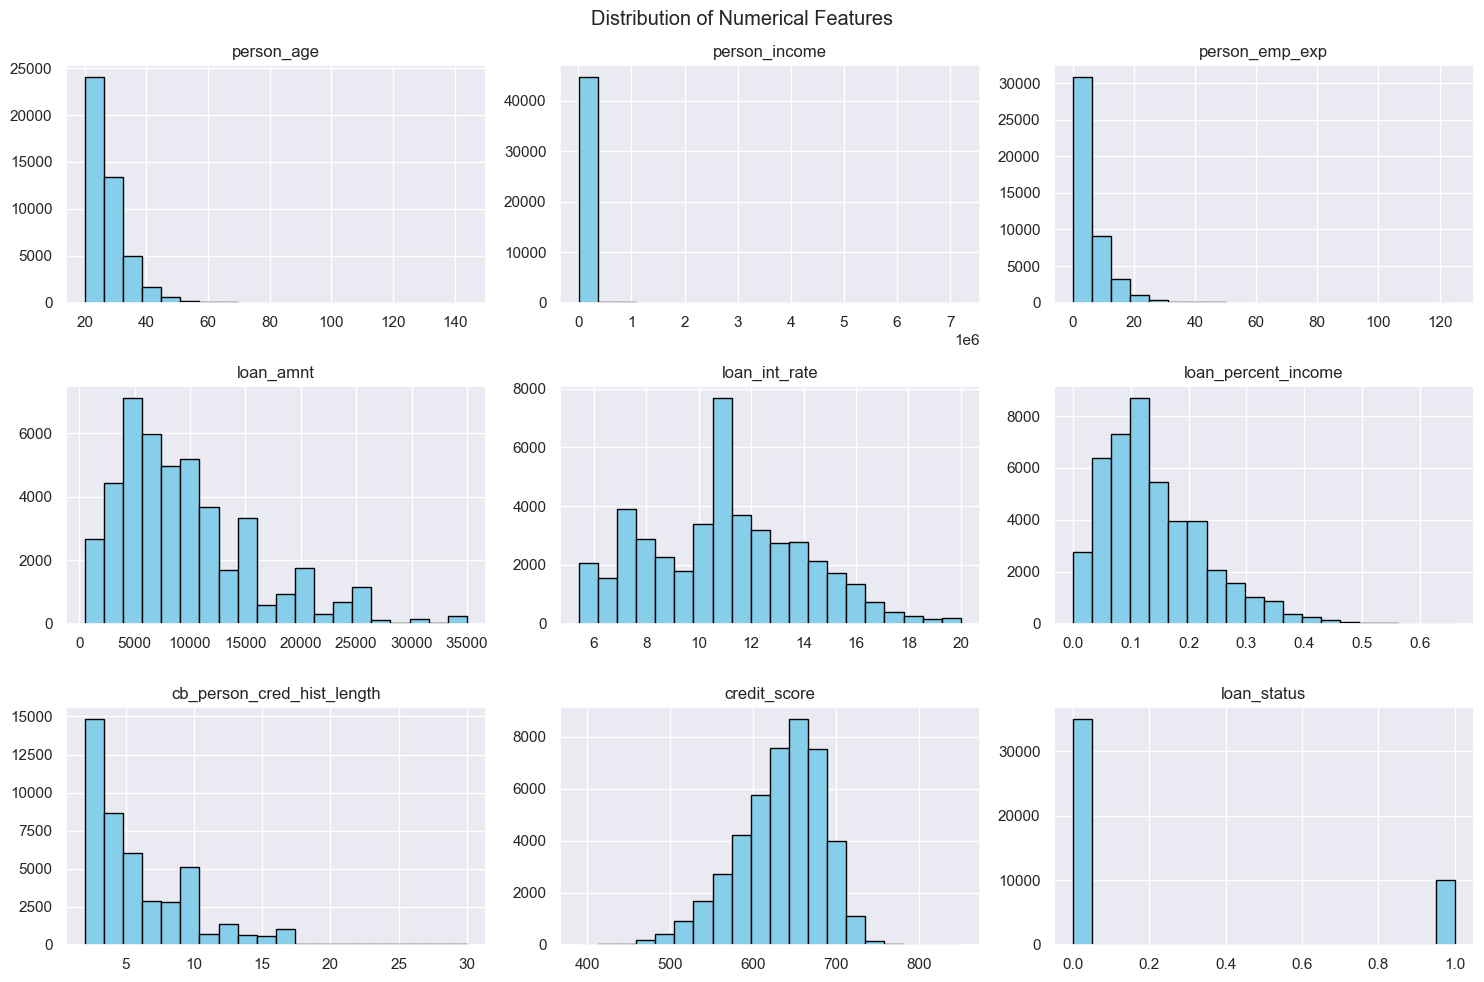

In [131]:
# Distribution of Numerical Features
numerical_features = [
    'person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
    'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
    'loan_status'
]

# Plot histograms for numerical features
df[numerical_features].hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

In [132]:
import warnings
warnings.filterwarnings("ignore")

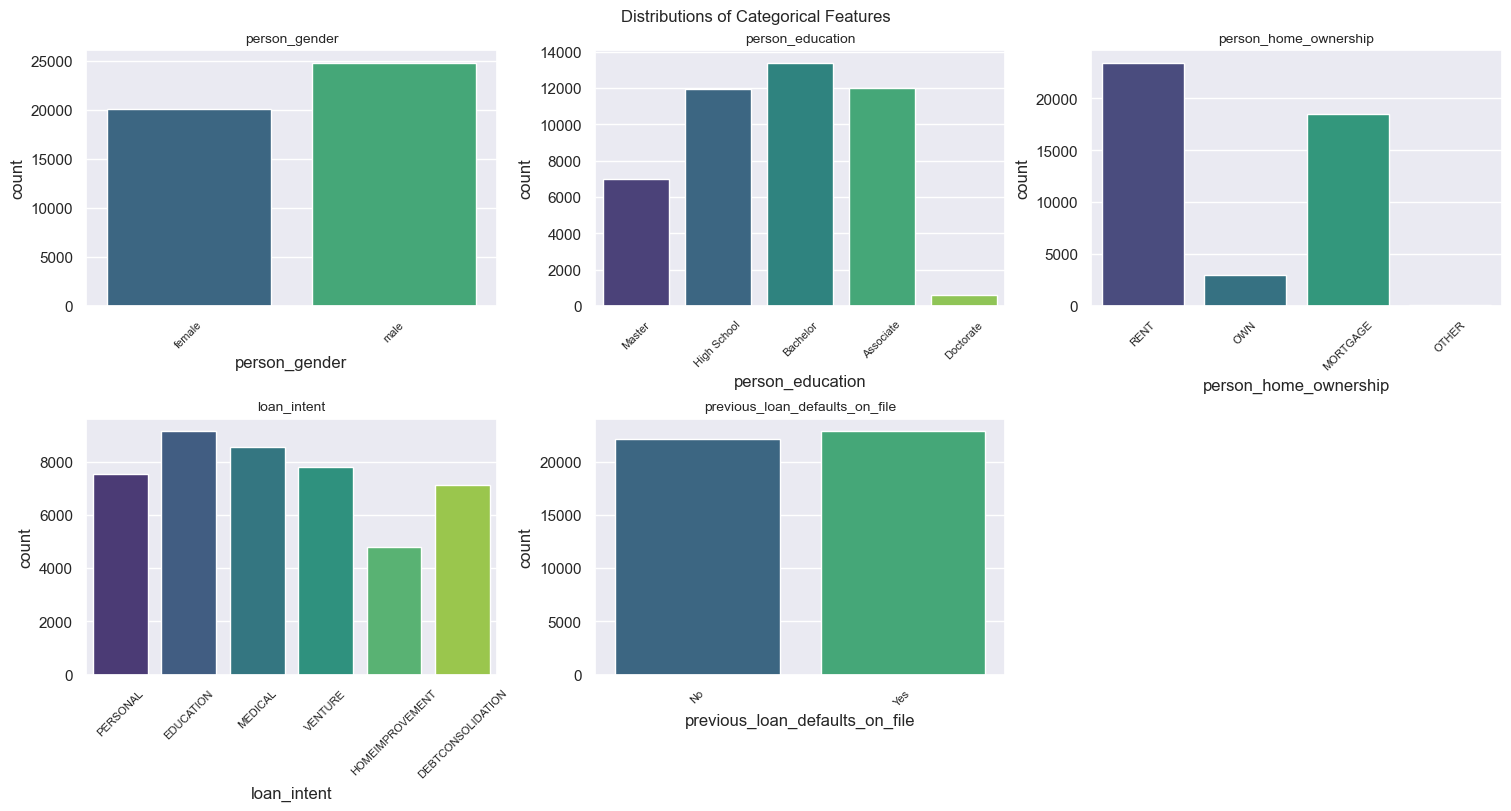

In [133]:
# Visualize the distribution of categorical variables

# Create subplots with a grid layout (e.g., 2 rows, 3 columns)
rows = 2
cols = (n_features + 1) // rows  # Calculate columns based on total features
fig, axes = plt.subplots(rows, cols, figsize=(15, 8), constrained_layout=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each categorical feature
for ax, col in zip(axes, categorical_features):
    sns.countplot(data=df, x=col, palette='viridis', ax=ax)
    ax.set_title(f'{col}', fontsize=10)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=8)

# Remove empty subplots (if any)
for ax in axes[len(categorical_features):]:
    ax.remove()

plt.suptitle('Distributions of Categorical Features', fontsize=12)
plt.show()


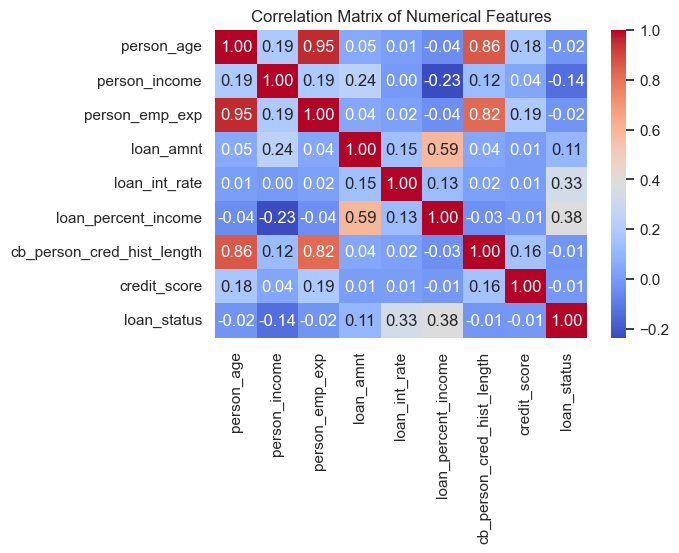

In [134]:
# Understand relationships between numerical features using a correlation matrix
# Compute and plot correlation matrix
plt.figure(figsize=(6, 4))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

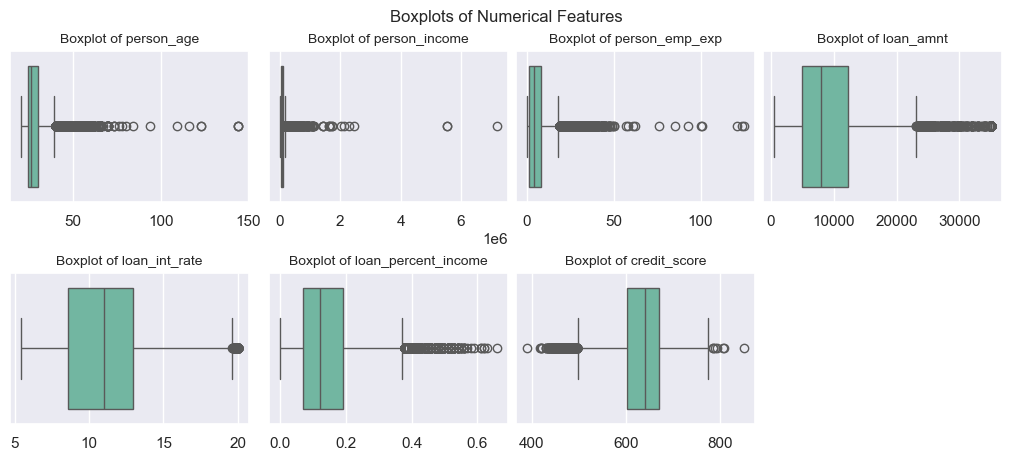

In [135]:
# Identify potential outliers in numerical features using boxplots

# Select numerical features
numerical_features = [
    'person_age', 'person_income', 'person_emp_exp', 
    'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'credit_score'
]

# Create subplots: 2 rows, 3 columns
fig, axes = plt.subplots(3, 4, figsize=(10, 6), constrained_layout=True)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each numerical feature
for ax, col in zip(axes, numerical_features):
    sns.boxplot(data=df, x=col, palette='Set2', ax=ax)
    ax.set_title(f'Boxplot of {col}', fontsize=10)
    ax.set_xlabel('')  # Remove x-axis label to reduce clutter

# Remove empty subplots (if any)
for ax in axes[len(numerical_features):]:
    ax.remove()

plt.suptitle('Boxplots of Numerical Features', fontsize=12)
plt.show()


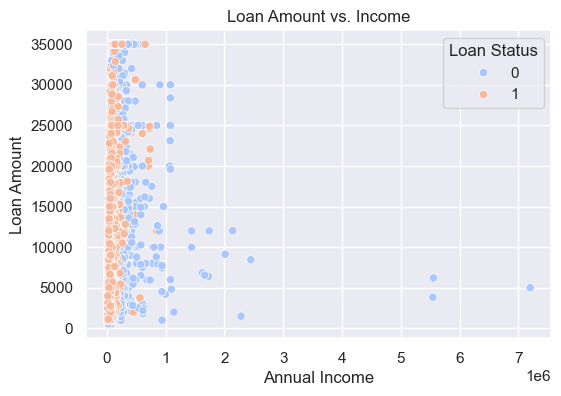

In [136]:
# Analyze Relationships Between Variables

# Scatter plot: Loan amount vs. Income
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='person_income', y='loan_amnt', hue='loan_status', palette='coolwarm')
plt.title('Loan Amount vs. Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()

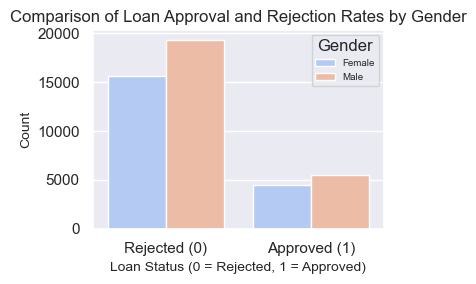

In [137]:
# Comparison of loan approval and rejection rates by gender
# Plot the loan status (0 & 1) by gender
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='loan_status', hue='person_gender', palette='coolwarm')

# Customize the plot
plt.title('Comparison of Loan Approval and Rejection Rates by Gender', fontsize=12)
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks([0, 1], ['Rejected (0)', 'Approved (1)'])
plt.legend(title='Gender', labels=['Female', 'Male'], fontsize=7)
plt.tight_layout()
plt.show()

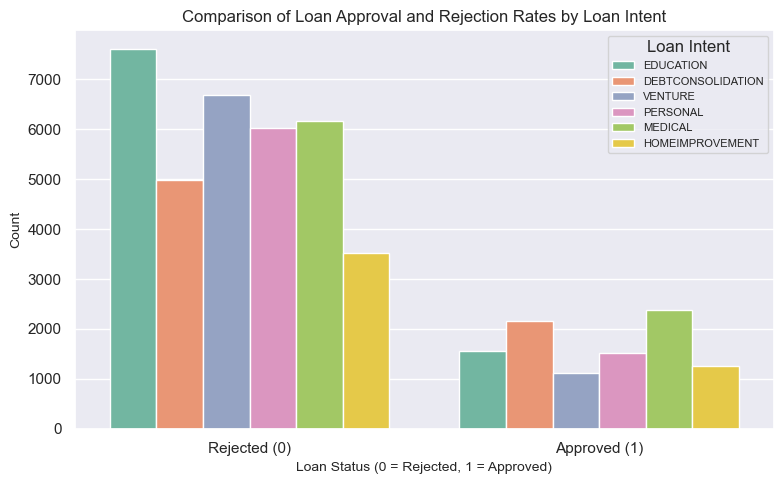

In [138]:
# Loan Status Comparison by Loan Intent
# Plot the loan status (0 & 1) by loan intent
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='loan_status', hue='loan_intent', palette='Set2')

# Customize the plot
plt.title('Comparison of Loan Approval and Rejection Rates by Loan Intent', fontsize=12)
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks([0, 1], ['Rejected (0)', 'Approved (1)'])

# Adjust the legend size
plt.legend(title='Loan Intent', fontsize=8)

plt.tight_layout()
plt.show()

  credit_score_group  loan_status
0            300-499     0.788538
1            500-599     0.774269
2            600-699     0.777813
3            700-799     0.787879
4            800-850     1.000000


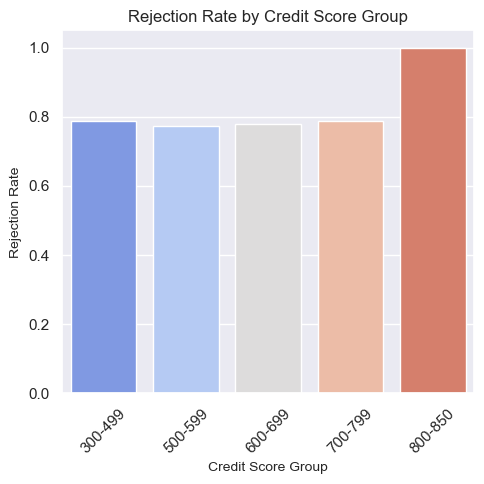

In [139]:
### Calculate Rejection Rate by Credit Score Group
# Define credit score bins and labels
bins = [300, 500, 600, 700, 800, 850]  # Credit score ranges
labels = ['300-499', '500-599', '600-699', '700-799', '800-850']

# Create a new column for credit score groups
df['credit_score_group'] = pd.cut(df['credit_score'], bins=bins, labels=labels, right=False)

# Calculate the rejection rate for each credit score group
rejection_rate = df.groupby('credit_score_group')['loan_status'].apply(lambda x: (x == 0).mean()).reset_index()

# Display the rejection rate by credit score group
print(rejection_rate)

### Visualize the Rejection Rate by Credit Score Group
# Plot rejection rate by credit score group
plt.figure(figsize=(5, 5))
sns.barplot(data=rejection_rate, x='credit_score_group', y='loan_status', palette='coolwarm')

# Customize the plot
plt.title('Rejection Rate by Credit Score Group', fontsize=12)
plt.xlabel('Credit Score Group', fontsize=10)
plt.ylabel('Rejection Rate', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Insights Summary

1. **Education Loans vs. Medical Loans**:
   - **Education loans** have the highest rejection rates, indicating that these loans are more likely to be rejected compared to other types of loans.
   - **Medical loans**, on the other hand, are most likely to be approved, suggesting that medical emergencies or health-related financial needs may be prioritized by lenders.

2. **Gender and Loan Rejection**:
   - **Male applicants** have much higher rejection rates compared to female applicants. This might suggest that, in this dataset, male applicants may have less favorable financial profiles or other factors that lead to higher loan rejections, or
   - The **gender-based** difference in rejection rates might warrant further investigation into whether there's a bias in the approval process.

3. **Correlation Between Age and Employment Experience**:
   - There is a **very strong correlation** between **age** and **years of employment experience**. This is logical, as older individuals tend to have more years of work experience, which could be an indicator of financial stability or reliability.

4. **Credit Scores and Loan Rejections**:
   - **Low credit scores** are strongly correlated with loan rejections. This suggests that credit scores play a significant role in the decision-making process for loan approval, with lower scores leading to higher rejection rates.


#### Preparing data for Classification

In [140]:
# Separate features (X) and target (y)
X = df.drop(columns=['loan_status', 'credit_score_group'], axis=1)
y = df['loan_status']

# Categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Create transformers for preprocessing
# For numerical features, we'll apply StandardScaler
numerical_transformer = StandardScaler()

# For categorical features, we'll apply OneHotEncoder
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine both transformers into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [141]:
# Create a pipeline with preprocessing and classification model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit the pipeline on the training data
pipeline.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object'))]))])

#### Define Models and Evaluation Metrics

In [142]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Define a function to evaluate metrics
def evaluate_model(model_name, y_true, y_pred, y_prob):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_prob)
    }

# Evaluate each model
results = []
for model_name, model in models.items():
    print(f"Training and evaluating {model_name}...")
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Evaluate and store results
    results.append(evaluate_model(model_name, y_test, y_pred, y_prob))

# Combine results into a DataFrame
results_df = pd.DataFrame(results)

# Find the best model based on ROC-AUC
best_model_row = results_df.loc[results_df['ROC-AUC'].idxmax()]
best_model_name = best_model_row['Model']
best_accuracy = best_model_row['Accuracy']
best_roc_auc = best_model_row['ROC-AUC']

# Display the results
print(results_df)
print(f"\nThe best model is {best_model_name} with an accuracy score of {best_accuracy:.2f} and ROC-AUC of {best_roc_auc:.2f}.")

Training and evaluating Logistic Regression...
Training and evaluating Random Forest...
Training and evaluating XGBoost...
Training and evaluating K-Nearest Neighbors...
                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.894556   0.776158  0.741791  0.758586  0.952684
1        Random Forest  0.929111   0.893800  0.774627  0.829957  0.973698
2              XGBoost  0.935778   0.888708  0.814428  0.849948  0.978730
3  K-Nearest Neighbors  0.893778   0.796067  0.704975  0.747757  0.925795

The best model is XGBoost with an accuracy score of 0.94 and ROC-AUC of 0.98.
